# MOBILE PRICE RANGE CLASSIFICATION

### Link to the Dataset: [Mobile Price Classification](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Getting our Data

In [2]:
df = pd.read_csv(r'train.csv', encoding = 'unicode_escape')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Data Preprocessing

In [3]:
df.isnull().any()  # checking for null values

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [4]:
# no null values are present

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# checking vif
variables = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.076717,battery_power
1,1.981927,blue
2,4.260479,clock_speed
3,2.015006,dual_sim
4,3.413529,fc
5,3.194321,four_g
6,3.961239,int_memory
7,3.911115,m_dep
8,12.972548,mobile_wt
9,4.646070,n_cores


In [7]:
# now, we'll drop columns which have vif>10
df = df.drop(['mobile_wt','px_width','sc_h'], axis=1)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,2,2,20,2549,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,2631,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,2769,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1411,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,6,14,1222,668,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,4,3,915,2032,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,8,3,868,3057,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,5,5,336,869,10,19,1,1,1,0


In [8]:
# removing all outliners
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,2,2,20,2549,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,2631,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,2769,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1411,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,6,14,1222,668,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,4,3,915,2032,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,8,3,868,3057,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,5,5,336,869,10,19,1,1,1,0


### Data Visualization

<AxesSubplot:>

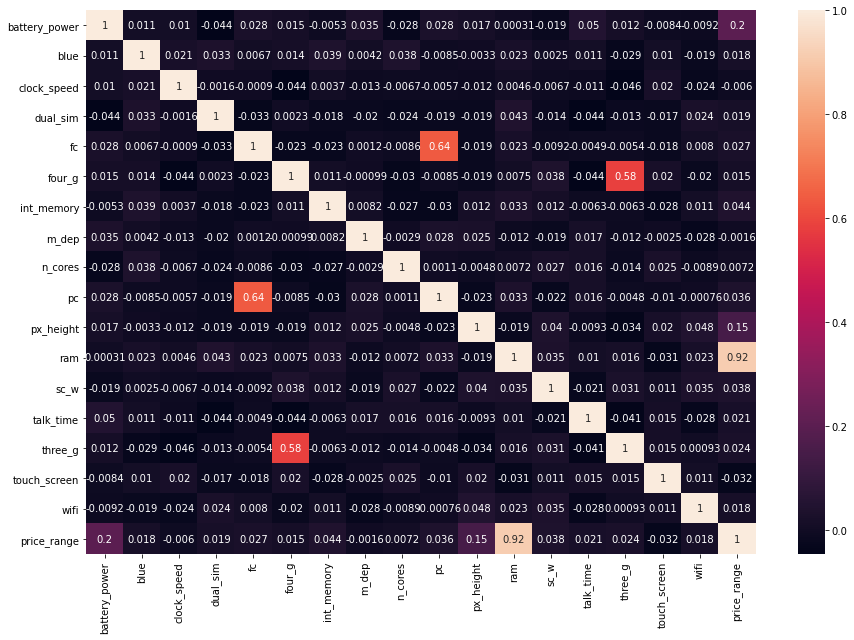

In [9]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)  # quantifying the relationship

### Splitting Data for Training and Testing

In [10]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### Model

In [11]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Making Predictions and Checking Accuracy

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
score = classifier.score(X_test, y_test)
score

0.8743718592964824

# Predictions are 87.43% accurate.

### Results' Visualization

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  4,  0,  0],
       [ 8, 80,  7,  0],
       [ 0, 21, 81,  2],
       [ 0,  0,  8, 99]], dtype=int64)

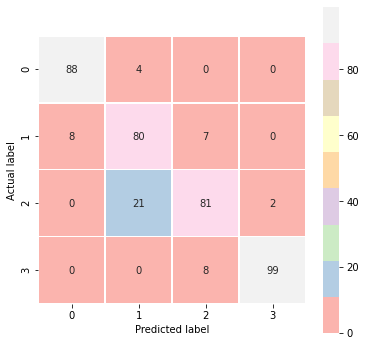

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()